In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import meerkat as mk
import pandas as pd

In [3]:
import numpy as np
dp = mk.get("celeba")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/eyubogln/.meerkat/datasets/celeba/main/list_attr_celeba.csv'

In [4]:
mk.config.display.max_image_height=300

In [5]:
dp = mk.embed(
    dp.lz[:10], input="img", encoder="bit", out
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from sklearn.base import ClusterMixin

In [ ]:
dp.write("")

In [9]:
mk

AttributeError: module 'meerkat' has no attribute 'get'

,path (PandasSeriesColumn),noisy_labels_0 (PandasSeriesColumn),noisy_labels_1 (PandasSeriesColumn),noisy_labels_5 (PandasSeriesColumn),noisy_labels_25 (PandasSeriesColumn),noisy_labels_50 (PandasSeriesColumn),is_valid (PandasSeriesColumn),label_id (PandasSeriesColumn),label (PandasSeriesColumn),label_idx (PandasSeriesColumn),split (PandasSeriesColumn),img_path (PandasSeriesColumn),img (ImageColumn)
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False,n02979186,cassette player,482,train,train/n02979186/n02979186_9036.JPEG,
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False,n02979186,cassette player,482,train,train/n02979186/n02979186_11957.JPEG,
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False,n02979186,cassette player,482,train,train/n02979186/n02979186_9715.JPEG,
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False,n02979186,cassette player,482,train,train/n02979186/n02979186_21736.JPEG,
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False,n02979186,cassette player,482,train,train/n02979186/ILSVRC2012_val_00046953.JPEG,
5,train/n02979186/n02979186_10568.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False,n02979186,cassette player,482,train,train/n02979186/n02979186_10568.JPEG,
6,train/n02979186/n02979186_2745.JPEG,n02979186,n02979186,n02979186,n03394916,n02979186,False,n02979186,cassette player,482,train,train/n02979186/n02979186_2745.JPEG,
7,train/n02979186/n02979186_3529.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False,n02979186,cassette player,482,train,train/n02979186/n02979186_3529.JPEG,
8,train/n02979186/n02979186_10756.JPEG,n02979186,n02979186,n02979186,n02979186,n03445777,False,n02979186,cassette player,482,train,train/n02979186/n02979186_10756.JPEG,
9,train/n02979186/n02979186_7058.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False,n02979186,cassette player,482,train,train/n02979186/n02979186_7058.JPEG,

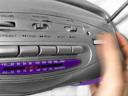
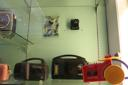
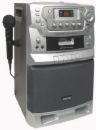
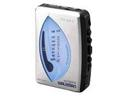
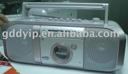
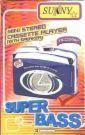
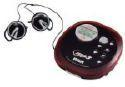
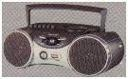
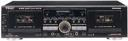
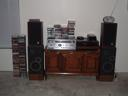

In [8]:
dp

In [1]:
import hapi
hapi.config.data_dir = "/Users/eyubogln/code/hapi/data/tasks"

In [5]:
preds = hapi.get_predictions(dataset="expw", include_data=True)

0it [00:00, ?it/s]

preds

,example_id (PandasSeriesColumn),confidence (NumpyArrayColumn),predicted_label (NumpyArrayColumn),image_name (PandasSeriesColumn),face_id_in_image (PandasSeriesColumn),face_box_top (PandasSeriesColumn),face_box_left (PandasSeriesColumn),face_box_right (PandasSeriesColumn),face_box_bottom (PandasSeriesColumn),face_box_cofidence (PandasSeriesColumn),expression_label (PandasSeriesColumn),image (ImageColumn)
0,amazed_expression_236_0,0.508,5,amazed_expression_236.jpg,0,14,51,107,70,86.3589,5,
1,distressed_wife_565_1,0.960,6,distressed_wife_565.jpg,1,113,319,455,249,65.4556,6,
2,heartbroken_woman_777_0,0.998,6,heartbroken_woman_777.jpg,0,124,115,230,239,71.4355,6,
3,crying_worker_764_0,0.730,4,crying_worker_764.jpg,0,266,912,1368,722,63.1153,4,
4,crying_woman_15_0,1.000,4,crying_woman_15.jpg,0,53,187,348,214,106.5000,4,
5,astound_face_86_0,1.000,3,astound_face_86.jpg,0,120,290,386,216,102.9270,3,
6,astound_president_656_5,1.000,3,astound_president_656.jpg,5,400,1296,1392,496,60.0189,3,
7,angry_president_302_0,0.919,6,angry_president_302.jpg,0,39,136,370,273,65.9237,6,
8,awe_wife_514_4,1.000,3,awe_wife_514.jpg,4,736,504,600,832,74.7429,3,
9,angry_face_151_0,0.716,6,angry_face_151.jpg,0,53,79,238,212,93.4123,0,

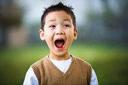
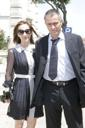
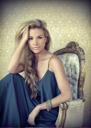
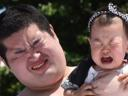
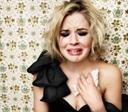
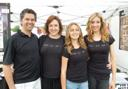
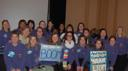
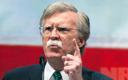
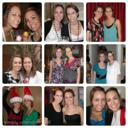
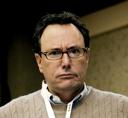
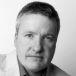
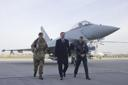
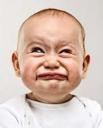
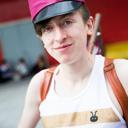
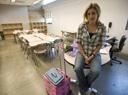
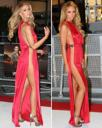
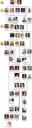
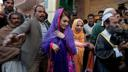
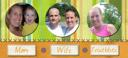
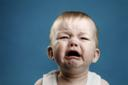

In [7]:
preds["fer/expw/microsoft_fer/21-02-16"]

In [6]:
pred_dp = mk.DataPanel(predictions["fer/expw/microsoft_fer/21-02-16"])
dp = pred_dp.merge(dp, on="example_id")

In [7]:
len(dp)

31510

In [11]:
(dp["predicted_label"].to_pandas() == dp["expression_label"]).mean()

0.7278641701047287

In [23]:
pred_dp

,confidence (NumpyArrayColumn),predicted_label (NumpyArrayColumn),suffix (PandasSeriesColumn),example_id (PandasSeriesColumn)
0,0.508,5,0,amazed_expression_236
1,0.960,6,1,distressed_wife_565
2,0.998,6,0,heartbroken_woman_777
3,0.730,4,0,crying_worker_764
4,1.000,4,0,crying_woman_15
5,1.000,3,0,astound_face_86
6,1.000,3,5,astound_president_656
7,0.919,6,0,angry_president_302
8,1.000,3,4,awe_wife_514
9,0.716,6,0,angry_face_151


,example_id (PandasSeriesColumn),confidence (NumpyArrayColumn),predicted_label (NumpyArrayColumn),suffix (PandasSeriesColumn),image_name (PandasSeriesColumn),face_id_in_image (PandasSeriesColumn),face_box_top (PandasSeriesColumn),face_box_left (PandasSeriesColumn),face_box_right (PandasSeriesColumn),face_box_bottom (PandasSeriesColumn),face_box_cofidence (PandasSeriesColumn),expression_label (PandasSeriesColumn),image (ImageColumn)
0,amazed_expression_236,0.508,5,0,amazed_expression_236.jpg,0,14,51,107,70,86.3589,5,
1,distressed_wife_565,0.960,6,1,distressed_wife_565.jpg,1,113,319,455,249,65.4556,6,
2,heartbroken_woman_777,0.998,6,0,heartbroken_woman_777.jpg,0,124,115,230,239,71.4355,6,
3,crying_worker_764,0.730,4,0,crying_worker_764.jpg,0,266,912,1368,722,63.1153,4,
4,crying_woman_15,1.000,4,0,crying_woman_15.jpg,0,53,187,348,214,106.5000,4,
5,astound_face_86,1.000,3,0,astound_face_86.jpg,0,120,290,386,216,102.9270,3,
6,astound_president_656,1.000,3,5,astound_president_656.jpg,2,540,162,324,702,71.3333,3,
7,astound_president_656,1.000,3,5,astound_president_656.jpg,6,352,784,880,448,57.2031,3,
8,astound_president_656,1.000,3,5,astound_president_656.jpg,1,464,588,723,599,76.9698,3,
9,astound_president_656,1.000,3,5,astound_president_656.jpg,1,464,588,723,599,76.9698,3,

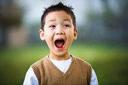
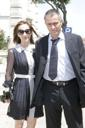
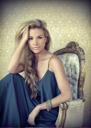
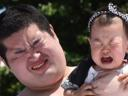
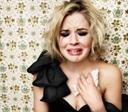
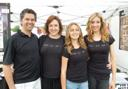
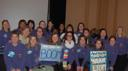
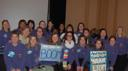
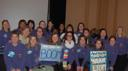
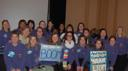
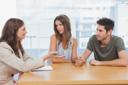
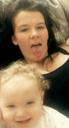
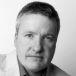
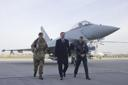
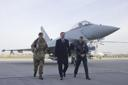
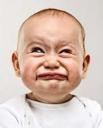
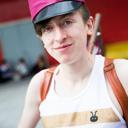
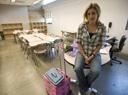
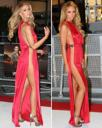
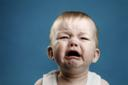

In [24]:
pred_dp.merge(dp, on="example_id")

,image_name (PandasSeriesColumn),face_id_in_image (PandasSeriesColumn),face_box_top (PandasSeriesColumn),face_box_left (PandasSeriesColumn),face_box_right (PandasSeriesColumn),face_box_bottom (PandasSeriesColumn),face_box_cofidence (PandasSeriesColumn),expression_label (PandasSeriesColumn),image (ImageColumn)
0,angry_actor_104.jpg,0,28,113,226,141,22.93620,0,
1,angry_actor_109.jpg,0,31,157,345,219,50.30560,0,
2,angry_actor_120.jpg,1,53,53,372,372,13.94340,2,
3,angry_actor_13.jpg,0,77,51,362,388,85.81040,3,
4,angry_actor_132.jpg,0,95,31,412,476,82.39480,0,
5,angry_actor_137.jpg,0,93,468,842,467,88.95190,0,
6,angry_actor_139.jpg,0,0,0,1127,1127,33.52480,0,
7,angry_actor_14.jpg,0,13,120,200,93,39.75540,0,
8,angry_actor_147.jpg,1,119,47,142,214,8.79739,6,
9,angry_actor_150.jpg,0,56,263,376,169,81.87920,0,

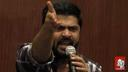
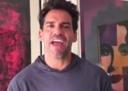
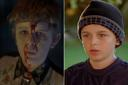
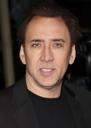
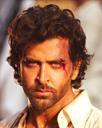
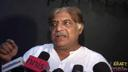
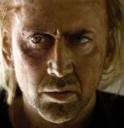
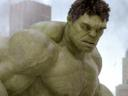
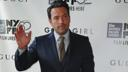
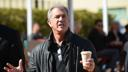
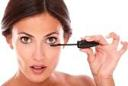
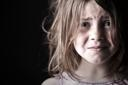
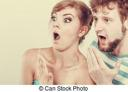
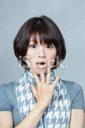
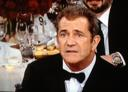
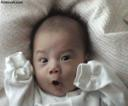
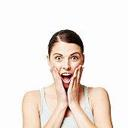
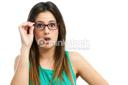
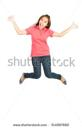
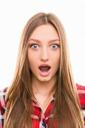

In [4]:
dp

In [7]:
import os
from tqdm.auto import tqdm
df = pd.read_csv(
    "/Users/eyubogln/.meerkat/datasets/expw/main/label/label.lst",
    delimiter=" ",
    names=["image_name", "face_id_in_image", "face_box_top", "face_box_left", "face_box_right", "face_box_bottom", "face_box_cofidence", "expression_label"]
)
# for name in tqdm(df["image_name"]):
#     if not os.path.exists(
#         os.path.join(
#             "/Users/eyubogln/.meerkat/datasets/expw/main/image/origin",
#             name
#         )
#     ):
#         raise ValueError
    

In [12]:
assert df["image_name"].apply(lambda name: os.path.exists(
         os.path.join(
             "/Users/eyubogln/.meerkat/datasets/expw/main/image/origin",
             name
         )
     )
).all()


In [ ]:
df["image_name"]

0                 angry_actor_104.jpg
1                 angry_actor_109.jpg
2                 angry_actor_120.jpg
3                  angry_actor_13.jpg
4                 angry_actor_132.jpg
                     ...             
91788    surprised_expression_546.jpg
91789    surprised_expression_381.jpg
91790    surprised_expression_395.jpg
91791           ecstatic_asian_31.jpg
91792    surprised_expression_394.jpg
Name: image_name, Length: 91793, dtype: object

 12%|█▏        | 131M/1.05G [1:06:03<7:44:32, 32.9kB/s]

In [7]:
rows = []
for name, builder in mk.datasets.datasets:
    rows.append(
        builder.info.__dict__
    )
pd.DataFrame(rows)

,name,description,citation,homepage,license,tags
0,pascal,None,None,None,None,None
1,imagenette,Imagenette is a subset of 10 easily classified...,None,https://github.com/fastai/imagenette,None,"[image_classification, computer_vision]"


In [43]:
from IPython.display import HTML
dp = mk.datasets.catalog
df = dp.to_pandas()
style = df.style.set_table_styles({
        "description":[
            {
                "selector": '', 
                "props": "max-width: 50%;"
            }
        ]
    }
)
HTML(style.to_html(index=))

,citation,description,homepage,license,name,tags
0,None,None,None,None,pascal,None
1,None,"Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).",https://github.com/fastai/imagenette,None,imagenette,"['image_classification', 'computer_vision']"


In [45]:
df.set_index("name")

,citation,description,homepage,license,tags
name,,,,,
pascal,None,None,None,None,None
imagenette,None,Imagenette is a subset of 10 easily classified...,https://github.com/fastai/imagenette,None,"[image_classification, computer_vision]"


In [29]:
HTML(df.to_html())

,citation,description,homepage,license,name,tags
0,None,None,None,None,pascal,None
1,None,"Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).",https://github.com/fastai/imagenette,None,imagenette,"[image_classification, computer_vision]"


In [8]:
mk.datasets.datasets.catalog

,citation (ListColumn),description (ListColumn),homepage (ListColumn),license (ListColumn),name (PandasSeriesColumn),tags (ListColumn)
0,None,None,None,None,pascal,None
1,None,"'Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).'",'https://github.com/fastai/imagenette',None,imagenette,"['image_classification', 'computer_vision']"


In [11]:
from datasets import DownloadManager
manager = DownloadManager(
    dataset_name="test",
    data_dir="/Users/eyubogln/.meerkat/datasets/test",
    base_path="/Users/eyubogln/.meerkat/datasets/test",
)

In [2]:
from meerkat.datasets.utils import download_url
out = download_url(
    "https://storage.googleapis.com/hapi-data/hapi.tar.gz", 
    "/Users/eyubogln/.meerkat/datasets/test"
)

In [5]:
from meerkat.datasets.utils import extract
data = extract(out, "/Users/eyubogln/.meerkat/datasets/test/hapi")

In [15]:
from datasets.utils.file_utils import get_from_cache

In [ ]:
extract(
    
)

In [13]:
import datasets
ds = datasets.load_dataset(
    path="sdfkjsdfh",
)

FileNotFoundError: Couldn't find a dataset script at /Users/eyubogln/code/hapi/examples/sdfkjsdfh/sdfkjsdfh.py or any data file in the same directory. Couldn't find 'sdfkjsdfh' on the Hugging Face Hub either: FileNotFoundError: Couldn't find file at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/sdfkjsdfh/sdfkjsdfh.py

In [4]:
ds["train"]

Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

In [3]:
from meerkat.contrib.pascal import build_pascal_2012_dp
dp = build_pascal_2012_dp(dataset_dir="/Users/eyubogln/data/pascal", download=False)

,id (PandasSeriesColumn),split (PandasSeriesColumn),file_name (PandasSeriesColumn),image (ImageColumn),aeroplane (PandasSeriesColumn),bicycle (PandasSeriesColumn),bird (PandasSeriesColumn),boat (PandasSeriesColumn),bottle (PandasSeriesColumn),bus (PandasSeriesColumn),car (PandasSeriesColumn),cat (PandasSeriesColumn),chair (PandasSeriesColumn),cow (PandasSeriesColumn),diningtable (PandasSeriesColumn),dog (PandasSeriesColumn),horse (PandasSeriesColumn),motorbike (PandasSeriesColumn),person (PandasSeriesColumn),pottedplant (PandasSeriesColumn),sheep (PandasSeriesColumn),sofa (PandasSeriesColumn),train (PandasSeriesColumn),tvmonitor (PandasSeriesColumn)
0,2008_000008,train,2008_000008.jpg,,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,2008_000015,train,2008_000015.jpg,,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008_000019,train,2008_000019.jpg,,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2008_000023,train,2008_000023.jpg,,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2008_000028,train,2008_000028.jpg,,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,2011_003261,val,2011_003261.jpg,,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11536,2011_003262,val,2011_003262.jpg,,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
11537,2011_003269,val,2011_003269.jpg,,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11538,2011_003271,val,2011_003271.jpg,,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

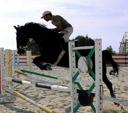
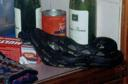
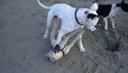
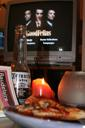
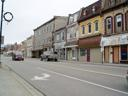
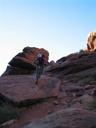
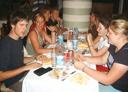
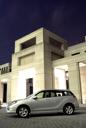
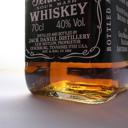
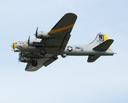

In [4]:
dp

In [9]:
import hapi
hapi.config.data_dir = "/Users/eyubogln/code/hapi/data/tasks"
hapi.get_predictions(task="mic", dataset="pascal", api=["google_mic", "microsoft_mic"]).keys()

100%|██████████| 4/4 [00:00<00:00, 24.51it/s]


dict_keys(['mic/pascal/google_mic/20-10-28', 'mic/pascal/microsoft_mic/20-10-28', 'mic/pascal/google_mic/22-02-14_v080', 'mic/pascal/microsoft_mic/22-02-14_v080'])

In [10]:
hapi.get_predictions(task="mic", dataset="coco", api="google_mic")

  0%|          | 0/2 [00:00<?, ?it/s]


AttributeError: module 'posixpath' has no attribute 'splittext'

In [8]:
dp = mk.DataPanel.read("/Users/eyubogln/code/hapi/data/tasks/str/lsvt/google_str/20-09-20.mk")

In [12]:
data = dp.to_pandas().to_dict(orient="records")

In [10]:
hapi.list()

,task,dataset,api,date,path,cost_per_10k
0,scr,command,ibm_scr,20-03-29,scr/command/ibm_scr/20-03-29.json,25.00
1,scr,command,deepspeech_lib_scr,20-03-29,scr/command/deepspeech_lib_scr/20-03-29.json,0.02
2,scr,command,google_scr,20-03-29,scr/command/google_scr/20-03-29.json,60.00
3,scr,command,microsoft_scr,20-03-29,scr/command/microsoft_scr/20-03-29.json,41.00
4,scr,command,google_scr,22-05-23,scr/command/google_scr/22-05-23.json,60.00
...,...,...,...,...,...,...
171,fer,ferplus,facepp_fer,22-05-23,fer/ferplus/facepp_fer/22-05-23.json,5.00
172,fer,ferplus,microsoft_fer,22-05-23,fer/ferplus/microsoft_fer/22-05-23.json,5.00
173,sa,imdb,baidu_sa,21-02-21,sa/imdb/baidu_sa/21-02-21.json,3.50
174,sa,imdb,google_sa,21-02-21,sa/imdb/google_sa/21-02-21.json,2.50


In [2]:
import hub

ds = hub.load("hub://activeloop/spoken_mnist")

In [21]:
from meerkat.contrib.fsdd import _download

_download("/Users/eyubogln/data/fsdd")

Cloning into '/Users/eyubogln/data/fsdd'...


In [22]:
ds

Dataset(path='hub://activeloop/spoken_mnist', read_only=True, tensors=['spectrograms', 'labels', 'audio', 'speakers'])

In [24]:
import pandas as pd 
df = pd.read_json(
    "/Users/eyubogln/code/hapi/data/tasks/scr/amnist/google_scr/20-03-29.json"
)
df

,image_name,confidence,original_predicted_label,example_id
0,AudioMNIST_0_01_0.wav,0.691792,6,AudioMNIST_0_01_0.wav
1,AudioMNIST_0_01_1.wav,0.706517,6,AudioMNIST_0_01_1.wav
2,AudioMNIST_0_01_10.wav,0.630332,0,AudioMNIST_0_01_10.wav
3,AudioMNIST_0_01_11.wav,0.636399,0,AudioMNIST_0_01_11.wav
4,AudioMNIST_0_01_12.wav,0.798487,0,AudioMNIST_0_01_12.wav
...,...,...,...,...
29995,AudioMNIST_9_60_5.wav,0.651034,9,AudioMNIST_9_60_5.wav
29996,AudioMNIST_9_60_6.wav,0.806397,9,AudioMNIST_9_60_6.wav
29997,AudioMNIST_9_60_7.wav,0.778751,9,AudioMNIST_9_60_7.wav
29998,AudioMNIST_9_60_8.wav,0.621300,9,AudioMNIST_9_60_8.wav
